In [1]:
from modules.pipeline import *

modules.report successfull loaded: 100%|██████████| 6/6 [00:33<00:00,  5.51s/it]


In [25]:
def build_mlg_with_class(data, features, className):
    """Build a multi-layer graph
    Args:
      data: a dataframe
      features: a list of dimension
      className: the target name

    Returns:
      A directed graph
    """
    
    CRP_G = nx.DiGraph() # create an empty directed graph

    # build edges
    list_of_edges = []
    list_of_nodes = []
    
    LIST_OF_CUSTOMERS = data.index.values.tolist()
    LEN_OF_FEATURES = len(features)
    
    colors = [
        '#e6194b',
        '#ffe119',
        '#4363d8',
        '#f58231',
        '#911eb4',
        '#46f0f0',
        '#f032e6',
        '#bcf60c',
        '#fabebe',
        '#008080',
        '#e6beff',
        '#9a6324',
        '#fffac8',
        '#800000',
        '#aafdc9',
        '#808000',
        '#ffd8b1',
        '#000075',
        '#9cb44b',
        '#808080'

    ]
    
    for el in LIST_OF_CUSTOMERS: #fetch on custumers list
        # layer building
        for i in range(LEN_OF_FEATURES):
            # add nodes
            list_of_nodes.append(('C'+str(i)+'-U-'+str(el),{'color': 'g'}))
            for attr in features[i].tolist(): # fetch on home ownership encode values
                #code = f"#{format(255-10*i, '02x')}{format(150+9*i, '02x')}{format(55+10*i, '02x')}"
                if int(data.loc[el,attr]) == 1: # check if exists relation between both
                    # bidirectional relation between home ownership and user
                    list_of_edges.append(('C'+str(i)+'-U-'+str(el),'C'+str(i)+'-M-'+attr, {'color': 'b'})) # add edge to list
                    list_of_edges.append(('C'+str(i)+'-M-'+attr, 'C'+str(i)+'-U-'+str(el), {'color': 'b'})) # add edge to list
                    # add nodes
                    list_of_nodes.append(('C'+str(i)+'-M-'+attr,{'color': colors[i]}))
            # add directed relation between user node from C1 and C2
            list_of_edges.append(('C'+str(i)+'-U-'+str(el),'C'+str(i+1)+'-U-'+str(el), {'color': 'r'})) # add edge to list
            list_of_edges.append(('C'+str(i+1 )+'-U-'+str(el), 'C'+str(i)+'-U-'+str(el), {'color': 'r'})) # add edge to list
        #code = f"#{format(255-10*LEN_OF_FEATURES, '02x')}{format(150+9*LEN_OF_FEATURES, '02x')}{format(55+10*LEN_OF_FEATURES, '02x')}"
        # add class nodes
        list_of_nodes.append(('C'+str(LEN_OF_FEATURES)+'-U-'+str(el),{'color': 'g'}))
        list_of_nodes.append(('C'+str(LEN_OF_FEATURES)+'-M-C-'+str(data.loc[el,className]),{'color': colors[LEN_OF_FEATURES]}))
        # bidirectional relation between home ownership and user
        list_of_edges.append(('C'+str(LEN_OF_FEATURES)+'-U-'+str(el),'C'+str(LEN_OF_FEATURES)+'-M-C-'+str(data.loc[el,className]), {'color': 'b'})) # add edge to list
        list_of_edges.append(('C'+str(LEN_OF_FEATURES)+'-M-C-'+str(data.loc[el,className]), 'C'+str(LEN_OF_FEATURES)+'-U-'+str(el), {'color': 'b'})) # add edge to list
        # add directed relation between user node from C1 and C2
        list_of_edges.append(('C'+str(LEN_OF_FEATURES)+'-U-'+str(el),'C'+str(LEN_OF_FEATURES-1)+'-U-'+str(el), {'color': 'r'})) # add edge to list
        list_of_edges.append(('C'+str(LEN_OF_FEATURES-1 )+'-U-'+str(el), 'C'+str(LEN_OF_FEATURES)+'-U-'+str(el), {'color': 'r'})) # add edge to list
    # add edges to the oriented graph
    # print(list_of_nodes)
    CRP_G.add_nodes_from(list_of_nodes)
    CRP_G.add_edges_from(list_of_edges)

    # return the graph
    return CRP_G

In [3]:
dataset = load_data_set_from_url(
    path='./datasets/private/3. Kaggle/credit-card-econometrics/AER_credit_card_data.csv'
    ,sep=','
    ,encoding="utf-8"
    ,index_col=None
    ,na_values=None)
dataset.reset_index(drop=True, inplace=True)
dataset

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [4]:
# eda
dataset = make_eda(dataframe=dataset, verbose=True)
# preprocessing
# (
# col_list,
# numeric_col,
# categorial_col,
# ordinal_factor_colums,
# nominal_factor_colums,
# numeric_with_outliers_columns,
# numeric_uniform_colums,
# DATA_OHE_LB_LBU_STDU_STDWO, 
# OHE,
# DATA_DISCRETIZE_OHE_2,
# OHE_2
# ) 
promise = make_preprocessing(
    dataset=dataset, 
    to_remove=[], 
    domain='AER', 
    cwd=os.getcwd()+f"/outputs/AER", 
    target_variable='card', 
    verbose=True,
    levels=[2] 
    )

# get dict of models
clfs = init_models()

## visualization of result
modelD = model_desc()

[]

	col_list:['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp', 'dependents', 'months', 'majorcards', 'active']
	numeric_col:['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
	categorial_col:['card', 'owner', 'selfemp']
	ordinal_factor_colums:['card', 'owner', 'selfemp', 'majorcards']
	nominal_factor_colums:[]
	numeric_with_outliers_columns:['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
	numeric_uniform_colums:[]
		
owner ---<>----- ['yes', 'no']
selfemp ---<>----- ['no', 'yes']
[]
OHE <----> [array(['no__owner', 'yes__owner'], dtype=object), array(['no__selfemp', 'yes__selfemp'], dtype=object)]
[]
[]
[]
[]
[]
Directory '/Users/djiemboutientcheuvictornico/Documents/M2_Thesis/M2_thesis/scripting/outputs/AER/mlna_preprocessing/data_selection_storage' already exists.


/Users/djiemboutientcheuvictornico/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [28]:
CRP_G = build_mlg_with_class(data=promise[7].sample(5), features=promise[8], className='card')

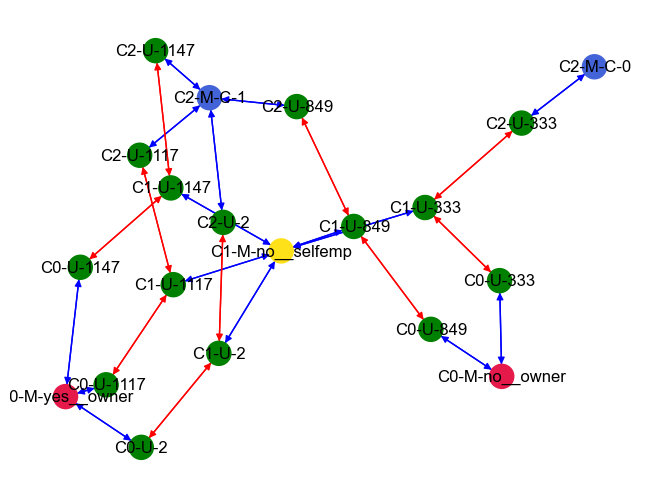

In [34]:
# show
def plot_digraph(CRP_G)
    colors = nx.get_edge_attributes(CRP_G,'color').values()
    colorsN = nx.get_node_attributes(CRP_G,'color').values()
    nx.draw(
        CRP_G,
        edge_color=colors,
        node_color=colorsN,
        with_labels=True)
    plt.show()

In [20]:
def random_sample_merge(df, target_column, percentage):
    # Séparation du dataframe en fonction des valeurs de la colonne cible
    groups = df.groupby(target_column)
    
    # Liste pour stocker les échantillons de chaque groupe
    samples = []
    
    # Pour chaque groupe, effectuer un échantillonnage aléatoire du pourcentage spécifié
    for group_name, group_df in groups:
        sample_size = int(len(group_df) * percentage)
        sample = group_df.sample(n=sample_size)
        samples.append(sample)
    
    # Fusionner les échantillons en un seul dataframe
    merged_df = pd.concat(samples)
    
    # Réorganiser l'index du dataframe fusionné
    merged_df.reset_index(drop=True, inplace=True)
    
    return merged_df

In [24]:
random_sample_merge(dataset, 'card', .2).card.value_counts()

yes    204
no      59
Name: card, dtype: int64